<a href="https://colab.research.google.com/github/2303A51670/ADM-Lab/blob/main/Adm_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
df = pd.read_csv('/content/mall.csv')

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'KMeans_Cluster', 'Hierarchical_Cluster'],
      dtype='object')

In [31]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster', 'Hierarchical_Cluster']


In [32]:
df.rename(columns={'kmeans_cluster': 'KMeans_Cluster'}, inplace=True)


In [18]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [17]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [19]:
X = df.iloc[:, [2, 3]].values

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

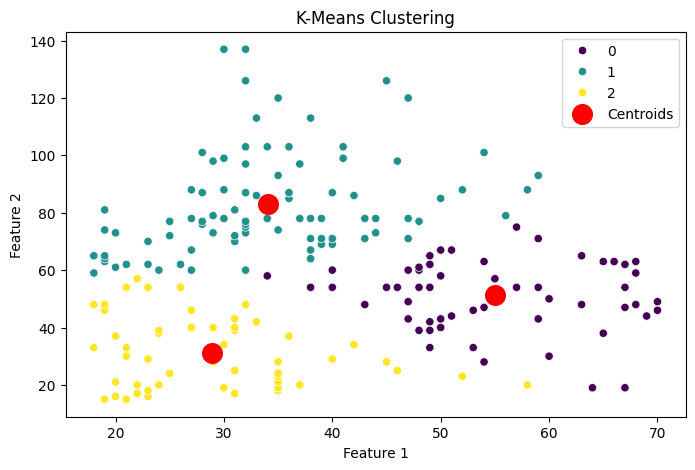

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

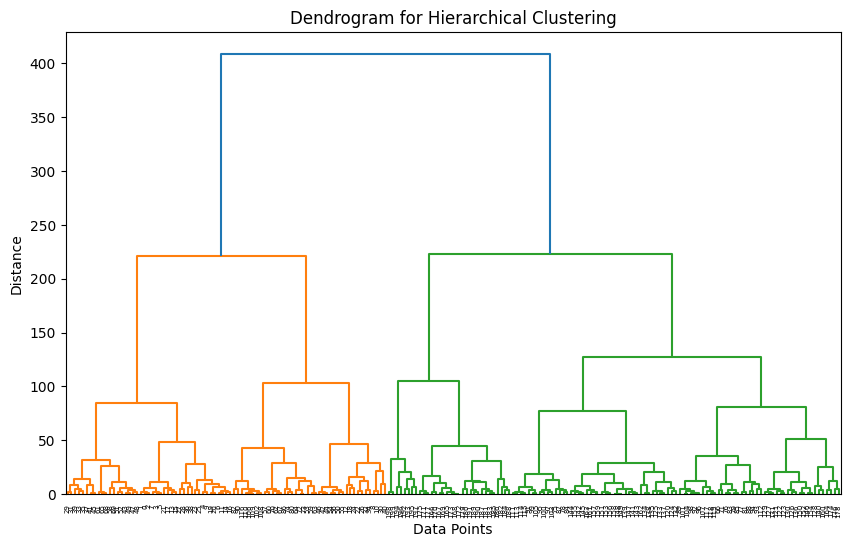

In [22]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [23]:
hc = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hc.fit_predict(X)

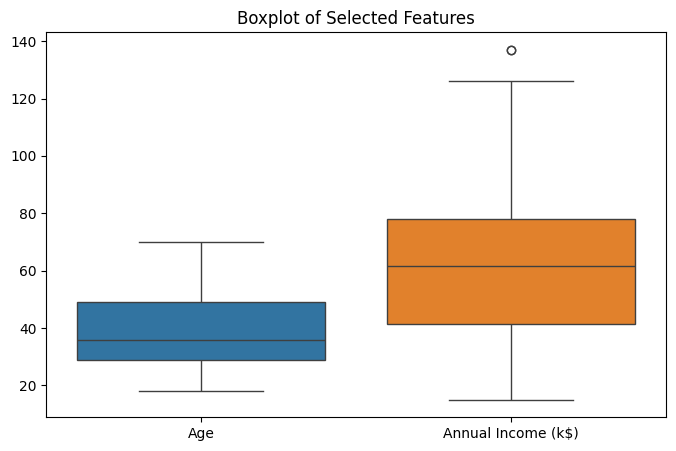

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.iloc[:, 2:4])
plt.title('Boxplot of Selected Features')
plt.show()

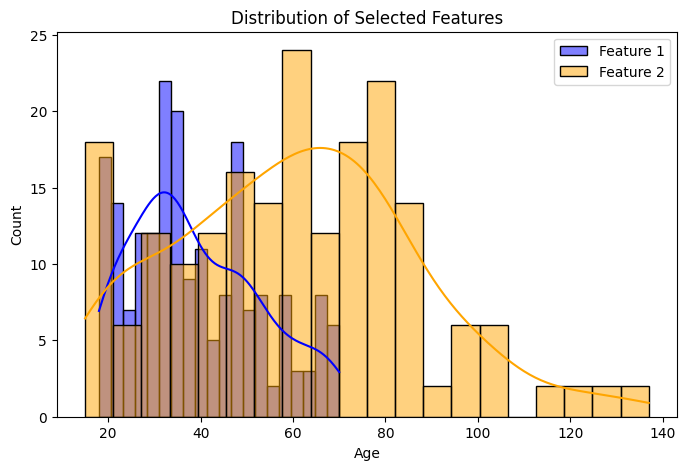

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df.iloc[:, 2], kde=True, bins=20, color='blue', label='Feature 1')
sns.histplot(df.iloc[:, 3], kde=True, bins=20, color='orange', label='Feature 2')
plt.title('Distribution of Selected Features')
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

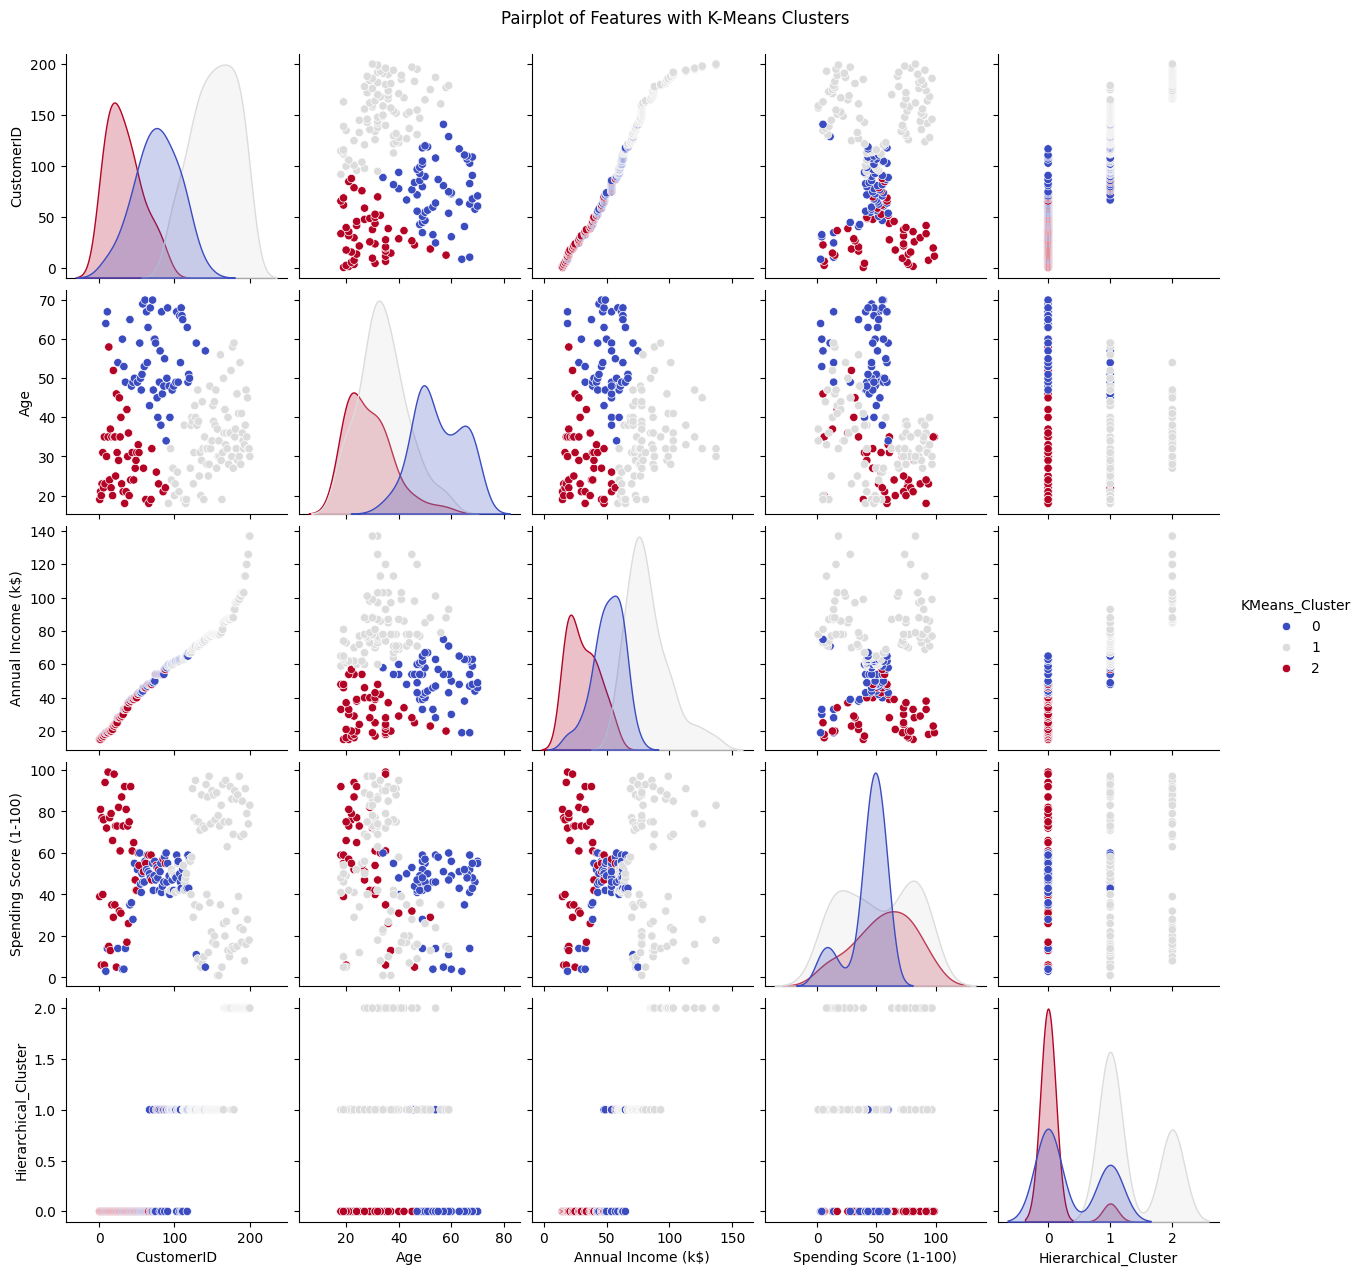

In [34]:

plt.figure(figsize=(8, 5))
sns.pairplot(df.iloc[:, :], hue='KMeans_Cluster', palette='coolwarm')
plt.suptitle('Pairplot of Features with K-Means Clusters', y=1.02)
plt.show()

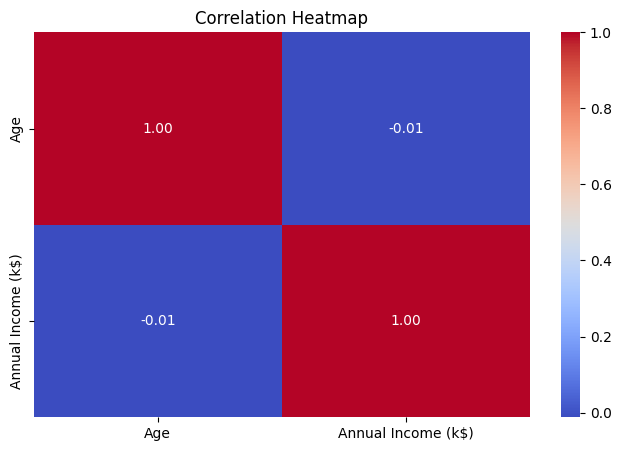

In [28]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, 2:4].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()